# This notebook makes heatmaps for pairwise similarity comparison grouping the TEs based on their repFam and repClass

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, pairwise2
from itertools import combinations

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## load data

In [3]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )

In [4]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv'],
      dtype='object')

In [8]:
logi['Deseq_indiv_locus_results.csv'].loc['explain']

'Deseq result individual loci level. Generated from R1 deseq pipeline.'

### load dTE table

In [9]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )

In [11]:
squire_df_ind = squire_indiv.index.astype(str) + "_" + squire_indiv['repName']
squire_indiv['df_index_repName'] = squire_df_ind

In [12]:
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-,0_PB1D9
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-,1_RSINE1
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194,ID4,ID,SINE,chr3,96619212,96619284,+,2_ID4
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227,PB1,Alu,SINE,chr15,93388865,93388965,-,3_PB1
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98,B2_Mm2,B2,SINE,chr11,94175967,94176153,-,4_B2_Mm2


### load identity matrix

In [15]:
mut_top20_df = pd.read_csv("./sequence_similarity_results/squire_top20_df_pairwise_identity.csv", header = 0, index_col = None )

In [16]:
mut_top20_df.head()

,ID1,ID2,PercentIdentity,Alignment_str
0,9437_RLTR4_MM-int,11292_RLTR4_Mm,21.603499,gagactgttggaccagggaatactggtaccctgccagtccccctgg...
1,9437_RLTR4_MM-int,12455_RLTR4_Mm,21.603499,gagactgttggaccagggaatactggtaccctgccagtccccctgg...
2,9437_RLTR4_MM-int,4915_RLTR4_MM-int,5.918367,gagactgttggaccagggaatactggtaccctgccagtccccctgg...
3,9437_RLTR4_MM-int,4128_RLTR4_MM-int,56.180758,gagactgttggaccagggaatactggtaccctg-cc-ag-tccccc...
4,9437_RLTR4_MM-int,7290_RLTR4_MM-int,44.418084,---g-ag-----act-g---tt-gga--cc-------aggga--a-...


In [17]:
squire_indiv2 = squire_indiv.set_index('df_index_repName')

In [128]:
mut_top10 = pd.read_csv("./sequence_similarity_results/squire_top10_df_pairwise_identity.csv", header = 0, index_col = None )
mut_top50 = pd.read_csv("./sequence_similarity_results/squire_top50_df_pairwise_identity.csv", header = 0, index_col = None )

In [129]:
wt_top10 = pd.read_csv("./sequence_similarity_results/squire_wt_top10_df_pairwise_identity.csv", header= 0, index_col = None )
wt_top20 = pd.read_csv("./sequence_similarity_results/squire_wt_top20_df_pairwise_identity.csv", header= 0, index_col = None )

In [130]:
rand_top10_1 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand10_1_pairwise_identity.csv", header= 0, index_col = None )
rand_top20_1 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand20_1_pairwise_identity.csv", header= 0, index_col = None )
rand_top50_1 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand50_1_pairwise_identity.csv", header= 0, index_col = None ) 

rand_top10_2 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand10_2_pairwise_identity.csv", header= 0, index_col = None )
rand_top20_2 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand20_2_pairwise_identity.csv", header= 0, index_col = None )
rand_top50_2 = pd.read_csv("./sequence_similarity_results/resampledSquire_rand50_2_pairwise_identity.csv", header= 0, index_col = None ) 

## Prepare heatmap plotting dfs

In [20]:
repClass_dict = dict( zip( squire_indiv2.index, squire_indiv2['repClass'] ))
repFamily_dict = dict( zip( squire_indiv2.index, squire_indiv2['repFamily'] ))

In [21]:
mut_top20_df['repClass1'] = [ repClass_dict[k] for k in mut_top20_df['ID1'] ]
mut_top20_df['repClass2'] = [ repClass_dict[k] for k in mut_top20_df['ID2'] ]

mut_top20_df['repFamily1'] = [ repFamily_dict[k] for k in mut_top20_df['ID1'] ]
mut_top20_df['repFamily2'] = [ repFamily_dict[k] for k in mut_top20_df['ID2'] ]

In [22]:
mut_top20_df.head()

,ID1,ID2,PercentIdentity,Alignment_str,repClass1,repClass2,repFamily1,repFamily2
0,9437_RLTR4_MM-int,11292_RLTR4_Mm,21.603499,gagactgttggaccagggaatactggtaccctgccagtccccctgg...,LTR,LTR,LTR,ERV1
1,9437_RLTR4_MM-int,12455_RLTR4_Mm,21.603499,gagactgttggaccagggaatactggtaccctgccagtccccctgg...,LTR,LTR,LTR,ERV1
2,9437_RLTR4_MM-int,4915_RLTR4_MM-int,5.918367,gagactgttggaccagggaatactggtaccctgccagtccccctgg...,LTR,LTR,LTR,LTR
3,9437_RLTR4_MM-int,4128_RLTR4_MM-int,56.180758,gagactgttggaccagggaatactggtaccctg-cc-ag-tccccc...,LTR,LTR,LTR,LTR
4,9437_RLTR4_MM-int,7290_RLTR4_MM-int,44.418084,---g-ag-----act-g---tt-gga--cc-------aggga--a-...,LTR,LTR,LTR,LTR


In [27]:
mut_top20_df.sort_values( by = ['repFamily1' , 'repFamily2'], inplace= True )

In [28]:
mut_top20_df.head()

,ID1,ID2,PercentIdentity,Alignment_str,repClass1,repClass2,repFamily1,repFamily2
123,9492_B2_Mm2,2935_PB1D10,42.777778,ggctggagagatgactcagtgg-ttaag-ag--tctg-a--ct--g...,SINE,SINE,B2,Alu
118,9492_B2_Mm2,4447_RSINE1,64.444444,ggc--tgg-agagatg--act-c--agtggttaagagtctg-actg...,SINE,SINE,B2,B4
115,9492_B2_Mm2,8036_RLTR4_Mm,24.021592,-g---g-c-------t--gg---ag-a-g--a--tg-a----c---...,SINE,LTR,B2,ERV1
117,9492_B2_Mm2,3429_RLTR4_Mm,25.251076,-g---g-c-------t--gg---ag-a-g--a--tg-a----c---...,SINE,LTR,B2,ERV1
119,9492_B2_Mm2,8749_RLTR4_Mm,25.394548,-g---g-c-------t--gg---ag-a-g--a--tg-a----c---...,SINE,LTR,B2,ERV1


## Make a function for group sorted heatmaps

### trial codes

In [25]:
mut_top20_df.columns

Index(['ID1', 'ID2', 'PercentIdentity', 'Alignment_str', 'repClass1',
       'repClass2', 'repFamily1', 'repFamily2'],
      dtype='object')

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


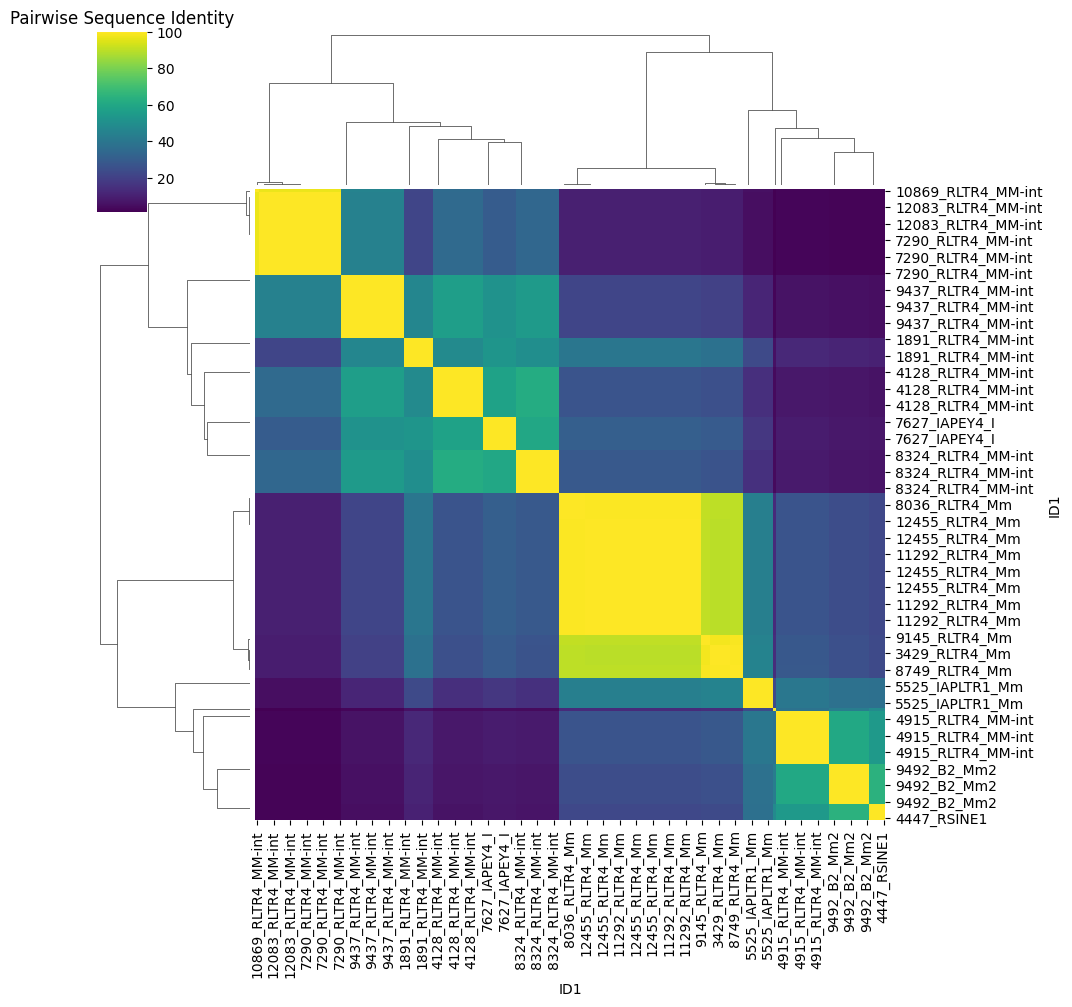

In [32]:
sequence_ids = mut_top20_df['ID1']
pairwise_identities = mut_top20_df.loc[:, ['ID1' , 'ID2', 'PercentIdentity']]

df = pd.DataFrame(index=sequence_ids, columns=sequence_ids, dtype=float)

for id1, id2, identity in pairwise_identities.values:
    df.loc[id1, id2] = identity
    df.loc[id2, id1] = identity
    df.loc[id1, id1] = 100
    df.loc[id2, id2] = 100
sns.clustermap(df.fillna(100), cmap="viridis", figsize=(10, 10), annot=False, )
plt.title("Pairwise Sequence Identity")
#plt.savefig(output_path, bbox_inches='tight')
#plt.close()
plt.show()

### setting color

In [35]:
sorting_cal_name = 'repFamily'
sortname1, sortname2 = sorting_cal_name+'1', sorting_cal_name+'2'
print( sortname1)
print( sortname2 )

repFamily1
repFamily2


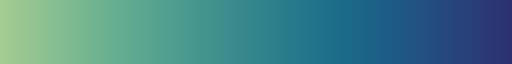

In [71]:
cmp1= sns.cubehelix_palette(as_cmap=True)
cmp2= sns.color_palette("crest", as_cmap=True)
cmp2

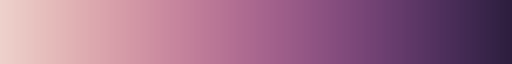

In [115]:
cmp1

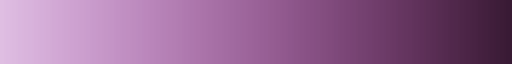

In [88]:
cmp3 = sns.cubehelix_palette(start=0.5, rot= -0.05, as_cmap=True, light=0.8)
cmp3

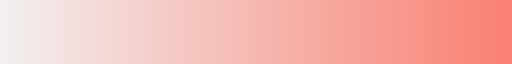

In [95]:
cmp4 = sns.light_palette("salmon", as_cmap=True)
cmp4

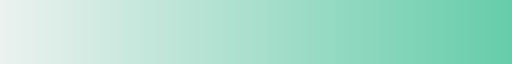

In [125]:
cmp5 = sns.light_palette("mediumaquamarine", as_cmap=True, )
cmp5

In [126]:
CMP0 = sns.cubehelix_palette(as_cmap=True) # a default color map
def class_grouped_heatmap( identity_df, repClass_dict, repFamily_dict, plot_title = '[TITLE HERE]', use_color_map = CMP0 ):
    """ make sequence similarity df based sorted by repClass/repFamily information. 
    @param identity_df: should have ID1, ID2 and PercentIdentity columns
    @param repClass_dict, repFamily_dict: dictionaries mapping all IDs from indentity_df to their repFamily/repClass

    @ return the axis of the heatmap"""
    
    # add repFamily and repClass information to the identity df
    sortfam_name, sortclass_name = 'repFamily'+'1', 'repClass'+'2'
    identity_df[ sortfam_name] = [ repFamily_dict[k] for k in identity_df['ID1'] ]
    identity_df[ sortclass_name] = [ repClass_dict[k] for k in identity_df['ID1'] ]
    
    # sort the df based on the repGroup information 
    identity_df.sort_values( by = [sortclass_name, sortfam_name, 'ID1' ], inplace= True )
    
    # make the plot and return the axis
    sequence_ids = identity_df['ID1']
    pairwise_identities = identity_df.loc[:, ['ID1' , 'ID2', 'PercentIdentity']]
    
    df = pd.DataFrame(index=sequence_ids, columns=sequence_ids, dtype=float)
    
    for id1, id2, identity in pairwise_identities.values:
        df.loc[id1, id2] = identity
        df.loc[id2, id1] = identity
        df.loc[id1, id1] = 100
        df.loc[id2, id2] = 100

    #cmp= sns.cubehelix_palette(as_cmap=True)
    g = sns.clustermap(df.fillna(100), cmap=use_color_map, figsize=(10, 10), annot=False , col_cluster=False, row_cluster = False,)
    plt.title("Pairwise Sequence Identity")

    ax_heatmap = g.ax_heatmap
    ax_heatmap.set_xlabel("TE ID")
    ax_heatmap.set_ylabel("")
    ax_heatmap.set_title(plot_title)
    
    #plt.close()
    #plt.show()

    return g

## make plots across conditions

### mutant

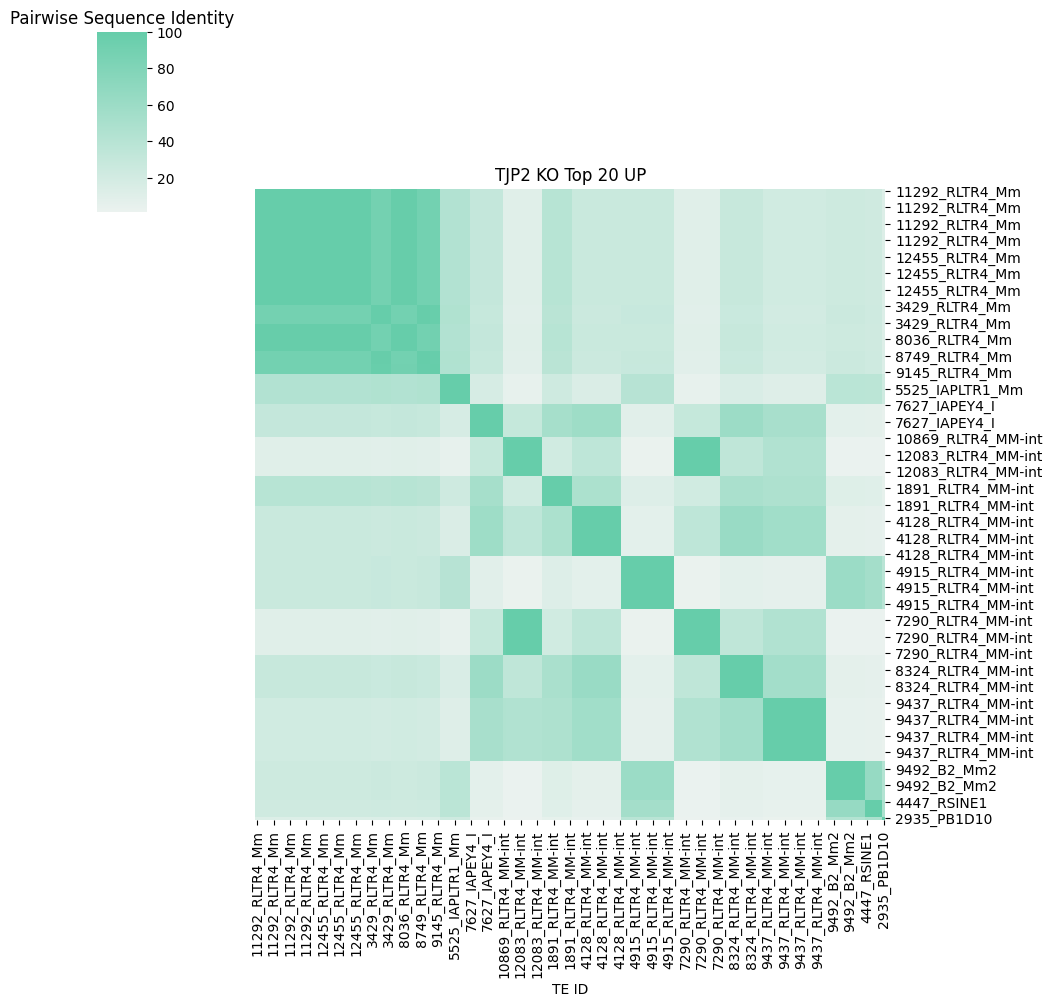

In [127]:
ret_ax = class_grouped_heatmap( mut_top20_df, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 KO Top 20 UP', use_color_map= cmp5 )

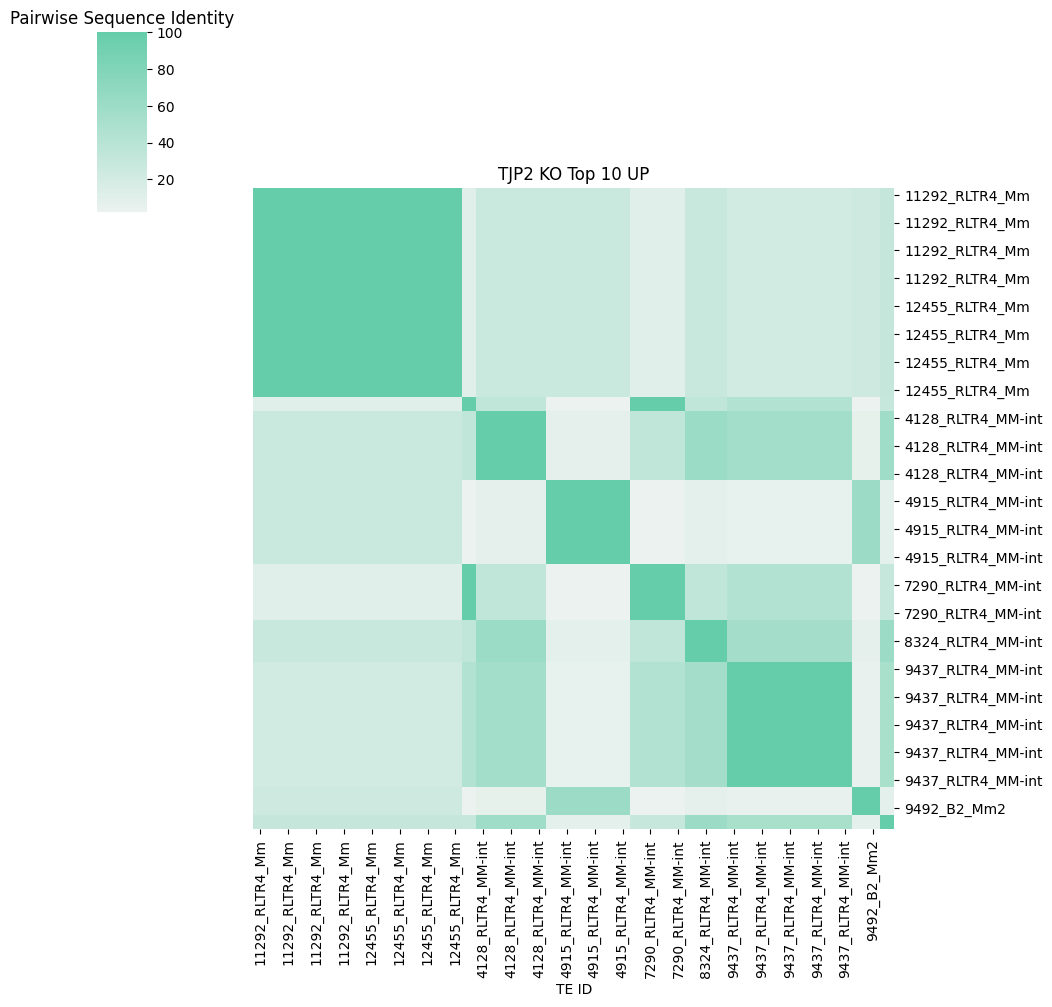

In [131]:
ret_ax = class_grouped_heatmap( mut_top10, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 KO Top 10 UP', use_color_map= cmp5 )

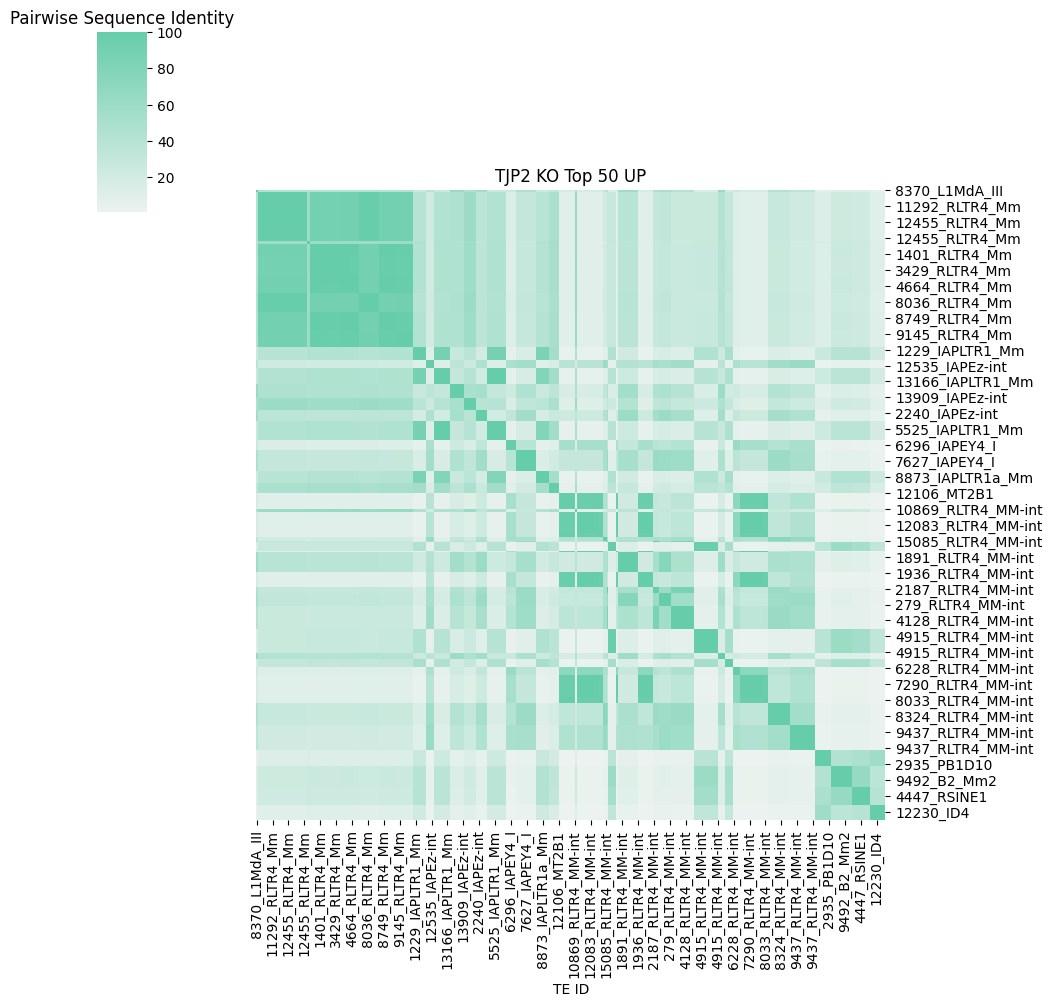

In [132]:
ret_ax = class_grouped_heatmap( mut_top50, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 KO Top 50 UP', use_color_map= cmp5 )

### WT

### random control

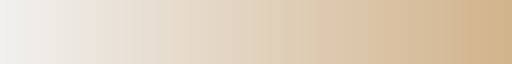

In [134]:
control_cmp = sns.light_palette("tan", as_cmap=True, )
control_cmp

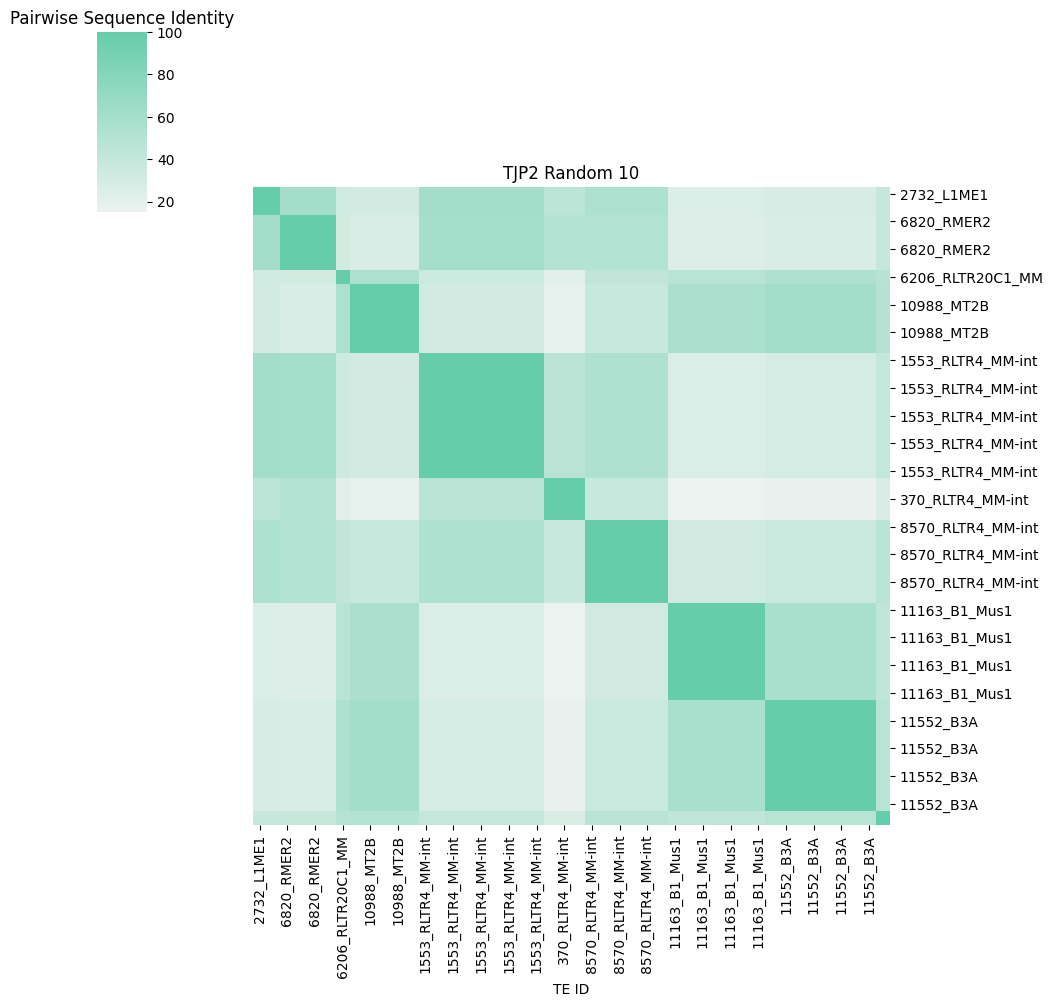

In [136]:
ret_ax = class_grouped_heatmap( rand_top10_1, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 Random 10', use_color_map= cmp5 )

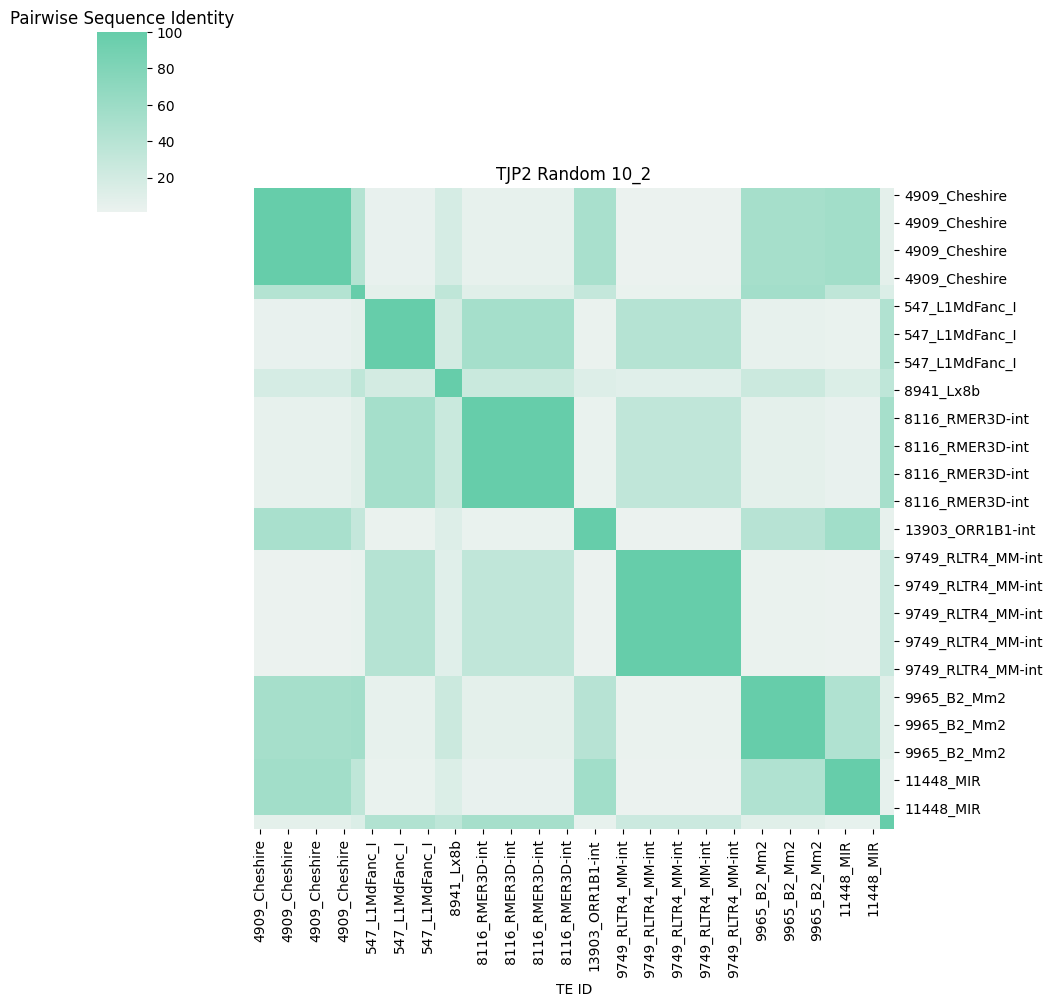

In [137]:
ret_ax = class_grouped_heatmap( rand_top10_2, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 Random 10_2', use_color_map= cmp5 )

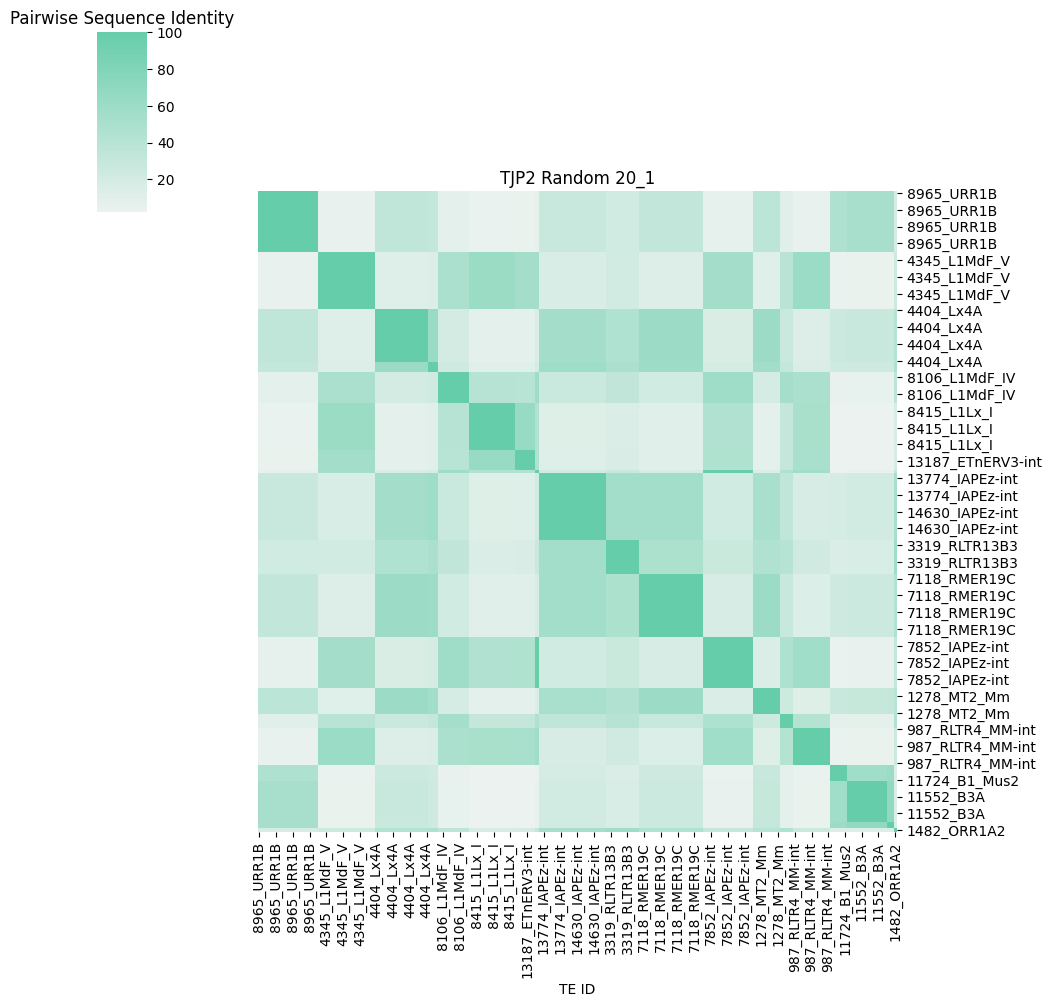

In [138]:
ret_ax = class_grouped_heatmap( rand_top20_1, repClass_dict= repClass_dict, repFamily_dict=repFamily_dict,plot_title= 'TJP2 Random 20_1', use_color_map= cmp5 )